In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.datasets import fetch_mldata
mnist= fetch_mldata('MNIST original')

In [6]:
np.random.seed(42)
idx= np.random.permutation(60000)[:]
X= mnist['data'][idx]
y= mnist['target'][idx]

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

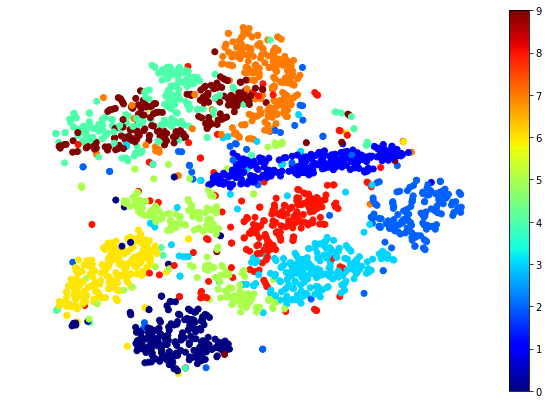

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

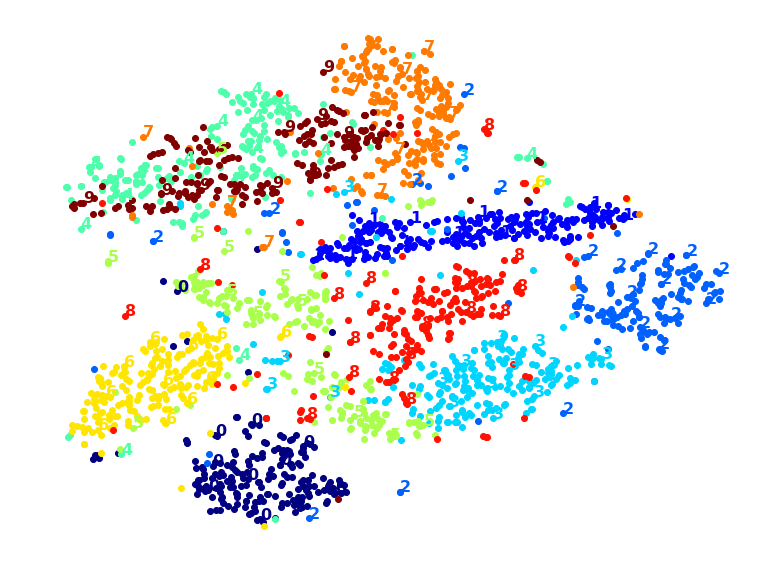

In [20]:
plot_digits(X_reduced, y)

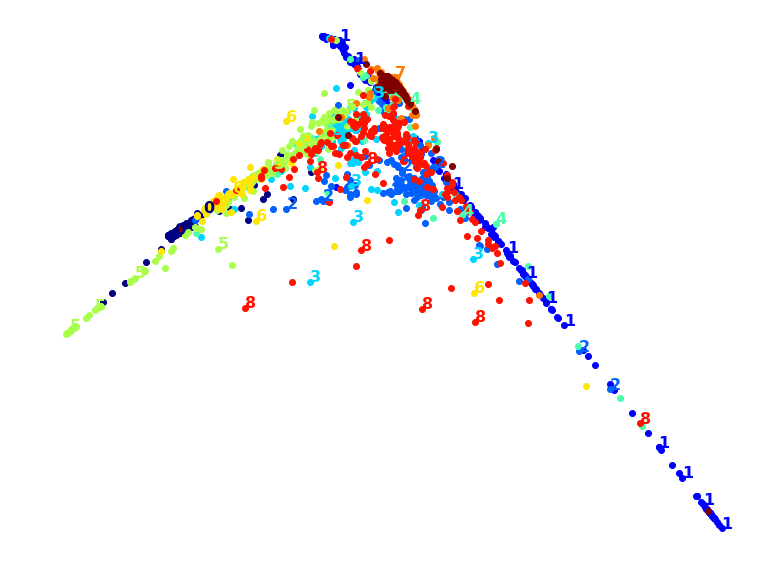

In [18]:
from sklearn.manifold import LocallyLinearEmbedding
#import time
#t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
#t1 = time.time()
#print("LLE took {:.1f}s.".format(t1 - t0))
#plot_digits(X_lle_reduced, y, images=X, figsize=(35, 25))
plot_digits(X_lle_reduced, y)
plt.show()

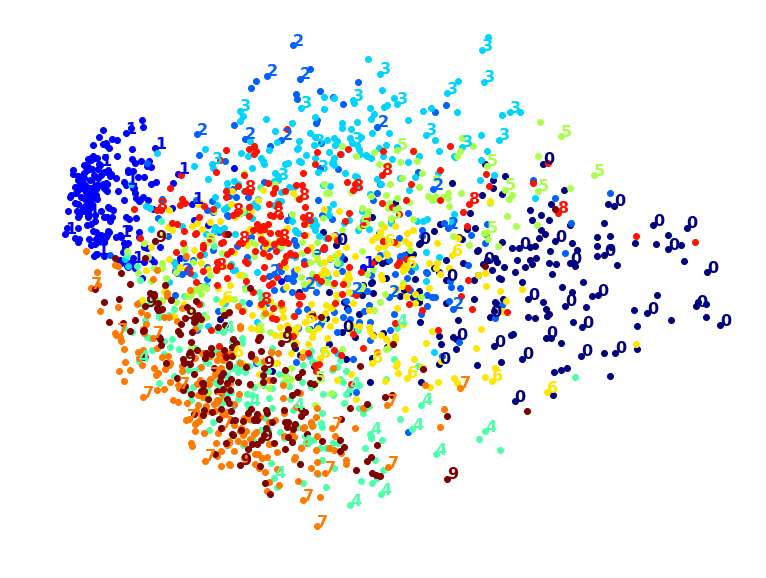

In [25]:
#from sklearn.decomposition import PCA
#import time

#t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
#t1 = time.time()
#print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

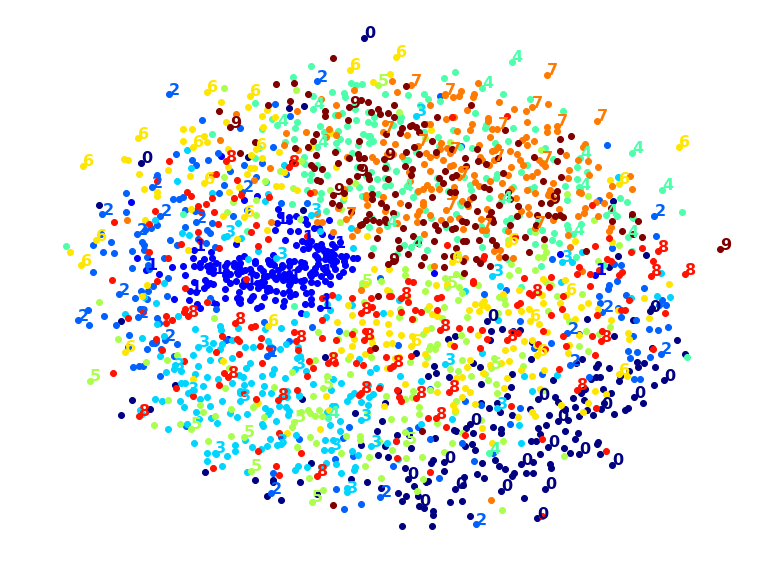

In [26]:
from sklearn.manifold import MDS
#t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
#t1 = time.time()
#print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


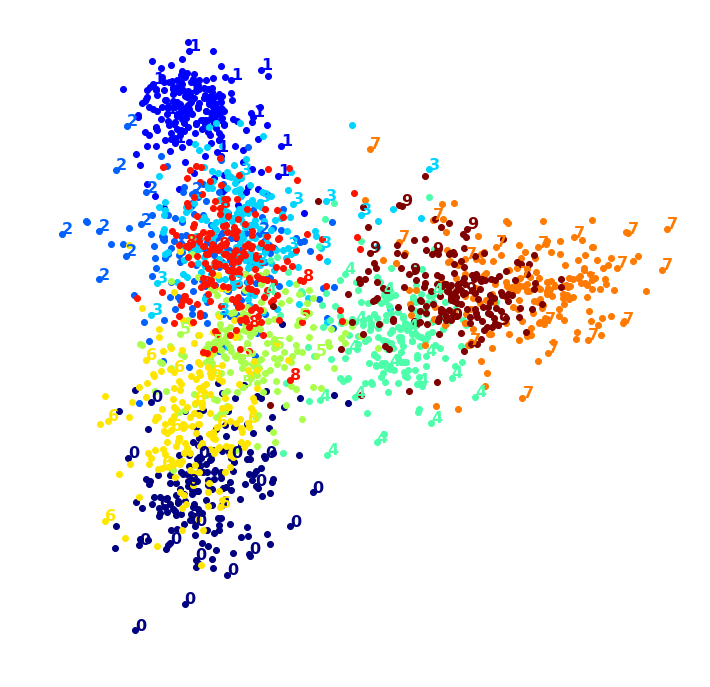

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
#t1 = time.time()
#print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()